# 1 Introduction

> Notebook com a geração de um modelo de clustering para análise de dados da suite of food security indicators da FAO

## 1.1 Business needs

> Entender os países que possuem um aspecto similar ao Brasil em 2017 para posteriormente analisar que variáveis fizeram melhorar ou piorar 

## 1.2 Dependencies

> Notebooks executados previamente:
* 01_el_data_preparation_food_security_indicators.ipynb

> Bibliotecas que devem estar instaladas para execução deste notebook

In [55]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install math
# !pip install sklearn
# !pip install matplotlib
# !pip install warnings

## 1.3 Imports

> Import all libraries needed. Include the latest versions used to allow reproducibility.

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestRegressor 
import matplotlib.pyplot as plt

import warnings

In [57]:
warnings.filterwarnings('ignore')

## 1.4 Global variables

> Declare all variables that will retain a constant value throught the notebook. For exemple, the path to the input data should be a global variable.

# 2 Exploratory data analysis

> Write a brief summary about which analysis and wrangling was performed.

## 2.1 Data reading

> Give a brief introduction to the data used and their sources.

In [58]:
df = pd.read_csv("../data/processed/Tabela_unificada.csv", encoding='ISO-8859–1')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Columns: 266 entries, Area Code to Value of food imports in total merchandise exports (percent) (3-year average)
dtypes: float64(263), int64(2), object(1)
memory usage: 2.1+ MB


## 2.2 Data wrangling

### Preparação dos dados para o modelo

Manter:
* Dados de 2017
* Dados não nulos

#### Colunas a serem consideradas

In [60]:
pd.set_option('display.max_seq_items', None)

df.columns

Index(['Area Code', 'Area', 'Year',
       'Cost of a healthy diet (PPP dollar per person per day)',
       'Cost of animal source foods', 'Cost of fruits',
       'Cost of legumes, nuts and seeds', 'Cost of oils and fats',
       'Cost of starchy staples', 'Cost of vegetables',
       'Number of people unable to afford a healthy diet (million)',
       'Percentage of the population unable to afford a healthy diet (percent)',
       'Adolescent Birth Rate (births per 1,000 women ages 15-19)',
       'Coefficient of human inequality', 'Difference from HDI value (%)',
       'Expected Years of Schooling (years)',
       'Expected Years of Schooling, female (years)',
       'Expected Years of Schooling, male (years)',
       'Gender Development Index (value)', 'Gender Inequality Index (value)',
       'Gross National Income Per Capita, female (2017 PPP$)',
       'Gross National Income Per Capita, male (2017 PPP$)',
       'Gross National Income Per Capita (2017 PPP$)',
       'Human Deve

In [135]:
df_independents = ['Cost of a healthy diet (PPP dollar per person per day)', 
'Coefficient of human inequality',
'Human Development Index (value)', 
'Inequality in eduation',
'Inequality in income', 
'Inequality in life expectancy',
'2.a.1 Agriculture share of Government Expenditure', 
'2.a.1 Agriculture value added share of GDP', 
'6.4.1 Water Use Efficiency (Agriculture (ISIC4 A01 A0210 A0322))', 
'6.4.1 Water Use Efficiency (Industries)',
'Gross domestic product per capita, PPP, (constant 2017 international $)',
'Per capita food supply variability (kcal/cap/day)', 
'Value of food imports in total merchandise exports (percent) (3-year average)',
'Prevalence of undernourishment (percent) (3-year average)'] 

df_cluster_feat = ['Human Development Index (value)',
                   'Percentage of the population unable to afford a healthy diet (percent)'] 

df_target = ['Percentage of the population unable to afford a healthy diet (percent)']

df_features = df_independents.copy()
df_features.extend(df_target)

df_columns = ['Area', 'Year'] 
df_columns.extend(df_features)

In [62]:
df_columns

['Area',
 'Year',
 'Cost of a healthy diet (PPP dollar per person per day)',
 'Coefficient of human inequality',
 'Human Development Index (value)',
 'Inequality in eduation',
 'Inequality in income',
 'Inequality in life expectancy',
 '2.a.1 Agriculture share of Government Expenditure',
 '2.a.1 Agriculture value added share of GDP',
 '6.4.1 Water Use Efficiency (Agriculture (ISIC4 A01 A0210 A0322))',
 '6.4.1 Water Use Efficiency (Industries)',
 'Gross domestic product per capita, PPP, (constant 2017 international $)',
 'Per capita food supply variability (kcal/cap/day)',
 'Value of food imports in total merchandise exports (percent) (3-year average)',
 'Prevalence of undernourishment (percent) (3-year average)',
 'Percentage of the population unable to afford a healthy diet (percent)']

In [63]:
df2 = df[df_columns]

In [64]:
df2[df2['Area'] == 'Brazil']

,Area,Year,Cost of a healthy diet (PPP dollar per person per day),Coefficient of human inequality,Human Development Index (value),Inequality in eduation,Inequality in income,Inequality in life expectancy,2.a.1 Agriculture share of Government Expenditure,2.a.1 Agriculture value added share of GDP,6.4.1 Water Use Efficiency (Agriculture (ISIC4 A01 A0210 A0322)),6.4.1 Water Use Efficiency (Industries),"Gross domestic product per capita, PPP, (constant 2017 international $)",Per capita food supply variability (kcal/cap/day),Value of food imports in total merchandise exports (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Percentage of the population unable to afford a healthy diet (percent)
95,Brazil,2017,2.809,23.035445,0.758,16.51122,42.52005,10.075064,0.93,4.60,0.39,29.37,14477.9,37.0,4.0,2.5,19.6
96,Brazil,2018,2.800,22.817045,0.762,15.53908,43.01739,9.894665,0.91,4.42,0.40,33.19,14619.6,39.0,4.0,2.5,18.5
97,Brazil,2019,2.882,22.516776,0.764,15.14731,42.69040,9.712619,0.86,4.21,0.36,33.44,14685.1,37.0,4.0,2.5,18.8
98,Brazil,2020,3.084,21.189392,0.758,13.80275,39.77494,9.990485,0.73,5.82,0.51,31.41,14022.0,26.0,4.0,2.5,12.7
99,Brazil,2021,3.350,22.531672,0.756,13.88125,43.72531,9.988457,0.83,6.89,0.63,30.47,14592.4,27.0,4.0,3.7,22.4


#### Ajuste dos tipos de dados

In [65]:
df2[['Area']] = df2[['Area']].astype('string')
df2[['Year']] = df2[['Year']].astype('int')
df2[df_features] = df2[df_features].astype('float')

In [66]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 17 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Area                                                                           1037 non-null   string 
 1   Year                                                                           1037 non-null   int64  
 2   Cost of a healthy diet (PPP dollar per person per day)                         817 non-null    float64
 3   Coefficient of human inequality                                                802 non-null    float64
 4   Human Development Index (value)                                                945 non-null    float64
 5   Inequality in eduation                                                         867 non-null    float64
 6   Inequality in income    

In [67]:
# # Salvando em CSV
# df2.to_csv('../reports/Tabela_com_selecao_features.csv', index=False)
# # Salvando em Excel
# df2.to_excel('../reports/Tabela_com_selecao_features.xlsx', index=False)

## 2.3 Exploration Analysis

### Análise das Distribuições

In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 17 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Area                                                                           1037 non-null   string 
 1   Year                                                                           1037 non-null   int64  
 2   Cost of a healthy diet (PPP dollar per person per day)                         817 non-null    float64
 3   Coefficient of human inequality                                                802 non-null    float64
 4   Human Development Index (value)                                                945 non-null    float64
 5   Inequality in eduation                                                         867 non-null    float64
 6   Inequality in income    

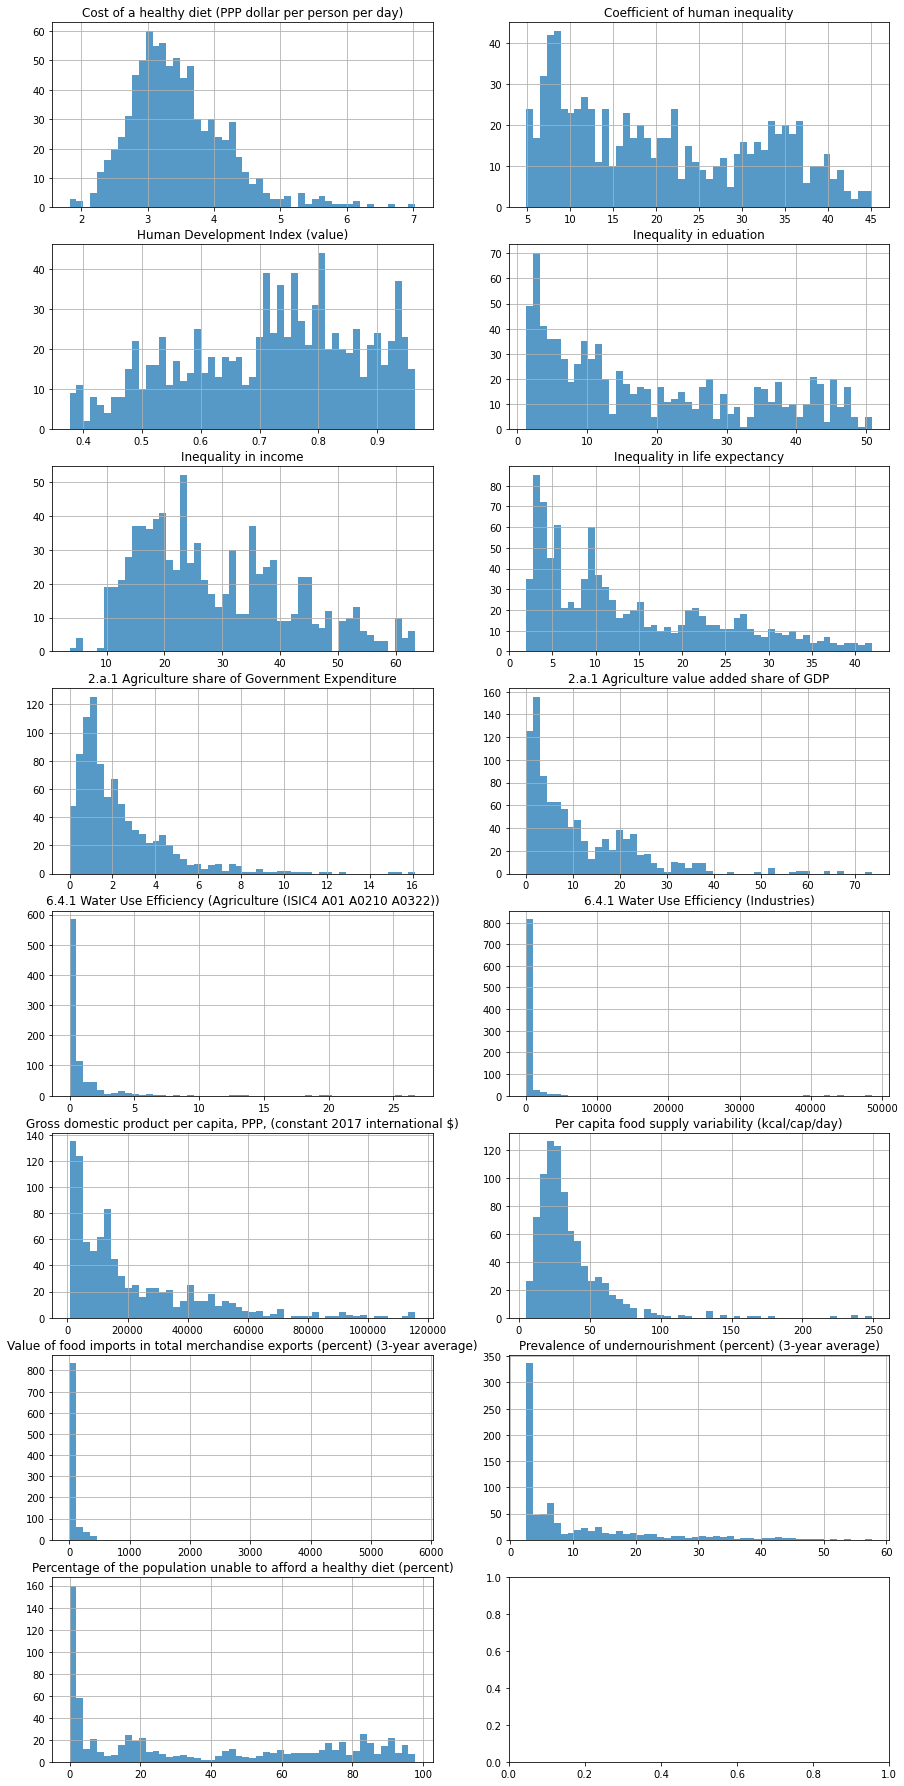

In [69]:
i = 2
last = len(df2.columns)-1
plot_rows = math.ceil((last-i+1) / 2)

fig, axes = plt.subplots(nrows=plot_rows, ncols=2)

fig.set_figheight(4*plot_rows)
fig.set_figwidth(15)

for ax in axes.flat:
    ax.set_title(df2.columns[i])
    ax.grid(True)
    ax.hist(df2[df2.columns[i]], 50, alpha=0.75)
    i = i+1
    
    if i > last:
        break

fig.show()


# 3 Data modeling

### Feature importance

In [70]:
df3_1 = df2[df_features].dropna().copy(deep=True)

df3_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 610 entries, 0 to 1001
Data columns (total 15 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Cost of a healthy diet (PPP dollar per person per day)                         610 non-null    float64
 1   Coefficient of human inequality                                                610 non-null    float64
 2   Human Development Index (value)                                                610 non-null    float64
 3   Inequality in eduation                                                         610 non-null    float64
 4   Inequality in income                                                           610 non-null    float64
 5   Inequality in life expectancy                                                  610 non-null    float64
 6   2.a.1 Agriculture share of Gov

In [71]:
df3_1[df_independents]

,Cost of a healthy diet (PPP dollar per person per day),Coefficient of human inequality,Human Development Index (value),Inequality in eduation,Inequality in income,Inequality in life expectancy,2.a.1 Agriculture share of Government Expenditure,2.a.1 Agriculture value added share of GDP,6.4.1 Water Use Efficiency (Agriculture (ISIC4 A01 A0210 A0322)),6.4.1 Water Use Efficiency (Industries),"Gross domestic product per capita, PPP, (constant 2017 international $)",Per capita food supply variability (kcal/cap/day),Value of food imports in total merchandise exports (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average)
0,3.096,10.007349,0.775,2.93495,18.95179,8.135306,2.49,14.99,0.30,19.72,12509.6,42.0,29.0,2.5
1,3.166,10.192764,0.781,2.93495,19.82759,7.815752,1.84,13.94,0.23,19.04,13231.4,65.0,26.0,2.5
2,3.237,8.983380,0.789,2.93495,16.51976,7.495431,2.01,11.53,0.18,23.65,14317.6,60.0,25.0,2.5
3,3.247,7.796320,0.769,2.93495,13.18770,7.266310,1.75,11.35,0.18,14.86,13357.7,47.0,24.0,2.5
4,3.527,8.363881,0.774,2.93495,15.12082,7.035874,2.34,11.34,0.17,26.93,14193.1,38.0,24.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,3.397,11.563975,0.833,7.36696,24.16123,3.163734,1.24,6.85,3.98,7.54,19682.3,30.0,130.0,2.5
998,3.428,11.597360,0.838,7.81501,24.01756,2.959510,0.93,6.73,4.11,7.88,20686.6,35.0,127.0,2.5
999,3.644,11.047490,0.841,7.81501,22.15848,3.168979,1.23,6.39,4.06,8.67,21534.0,35.0,124.0,2.5
1000,3.511,10.302058,0.832,7.81501,20.08265,3.008513,1.19,7.55,4.06,7.58,18259.0,24.0,120.0,2.5


#### Padronização dos dados

In [72]:
scaler = StandardScaler()
scaler_feat = scaler.fit_transform(df3_1)

df3_1_std = pd.DataFrame(scaler_feat, index=df3_1.index, columns=df3_1.columns)
df3_1_std

,Cost of a healthy diet (PPP dollar per person per day),Coefficient of human inequality,Human Development Index (value),Inequality in eduation,Inequality in income,Inequality in life expectancy,2.a.1 Agriculture share of Government Expenditure,2.a.1 Agriculture value added share of GDP,6.4.1 Water Use Efficiency (Agriculture (ISIC4 A01 A0210 A0322)),6.4.1 Water Use Efficiency (Industries),"Gross domestic product per capita, PPP, (constant 2017 international $)",Per capita food supply variability (kcal/cap/day),Value of food imports in total merchandise exports (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Percentage of the population unable to afford a healthy diet (percent)
0,-0.393956,-0.862915,0.274016,-1.065220,-0.681027,-0.498168,0.074149,0.347940,-0.245242,-0.324607,-0.429917,0.375346,0.077313,-0.667436,0.045548
1,-0.292093,-0.846918,0.311393,-1.065220,-0.616671,-0.528058,-0.241372,0.256679,-0.276335,-0.325612,-0.394635,1.418553,0.011354,-0.667436,0.068656
2,-0.188775,-0.951258,0.361228,-1.065220,-0.859737,-0.558020,-0.158851,0.047214,-0.298543,-0.318796,-0.341541,1.191769,-0.010633,-0.667436,0.129314
3,-0.174224,-1.053671,0.236639,-1.065220,-1.104584,-0.579452,-0.285059,0.031569,-0.298543,-0.331793,-0.388461,0.602130,-0.032619,-0.667436,0.100429
4,0.233228,-1.004705,0.267786,-1.065220,-0.962534,-0.601006,0.001337,0.030700,-0.302985,-0.313946,-0.347627,0.193919,-0.032619,-0.667436,0.169752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0.044054,-0.728617,0.635326,-0.758897,-0.298226,-0.963199,-0.532622,-0.359550,1.389319,-0.342616,-0.079313,-0.168936,2.297946,-0.667436,-0.566809
998,0.089165,-0.725737,0.666473,-0.727930,-0.308783,-0.982301,-0.683101,-0.369980,1.447062,-0.342114,-0.030222,0.057849,2.231987,-0.667436,-0.529259
999,0.403484,-0.773177,0.685162,-0.727930,-0.445392,-0.962708,-0.537476,-0.399531,1.424853,-0.340945,0.011199,0.057849,2.166028,-0.667436,-0.523482
1000,0.209945,-0.837489,0.629096,-0.727930,-0.597929,-0.977718,-0.556893,-0.298709,1.424853,-0.342557,-0.148884,-0.441076,2.078082,-0.667436,-0.526370


#### Heatmap

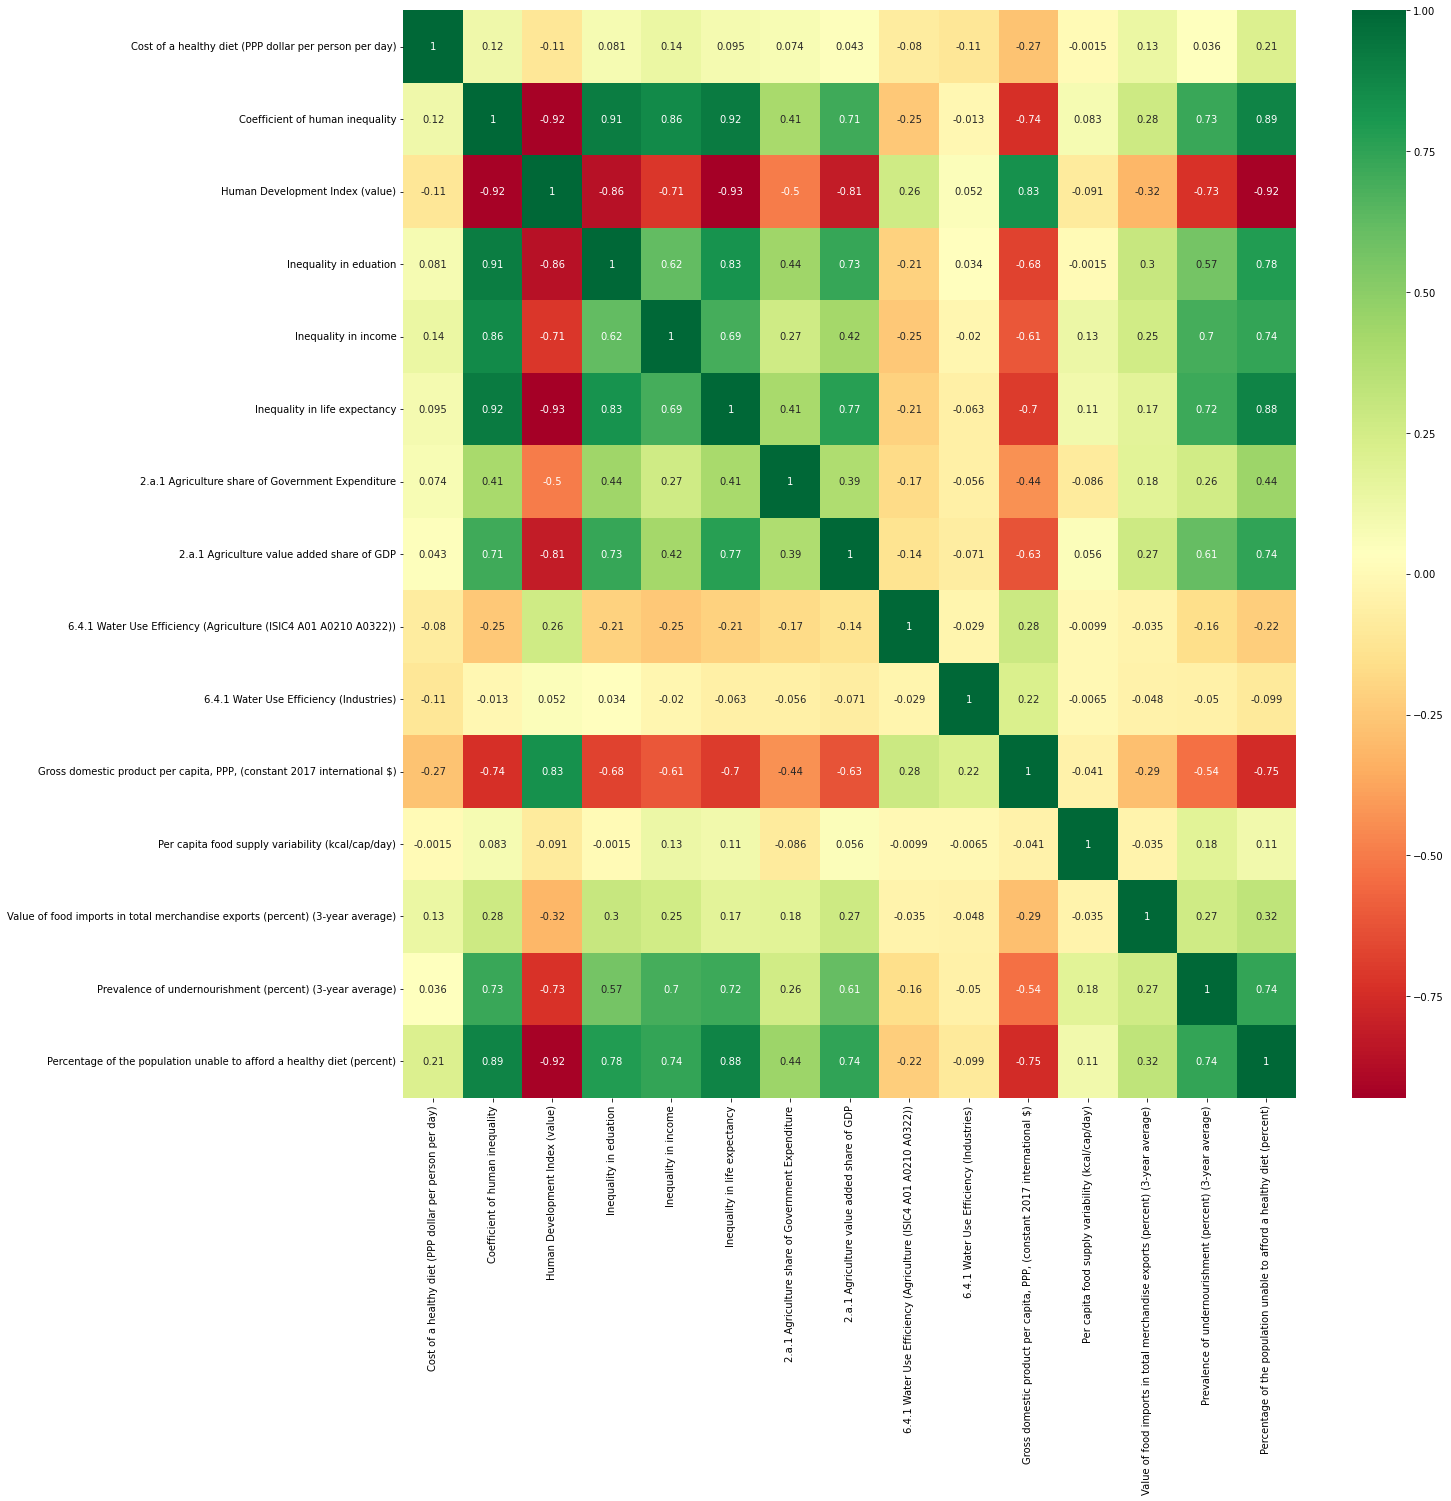

In [73]:
#get correlations of each features in dataset
corrmat = df3_1_std.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g = sns.heatmap(df3_1_std[top_corr_features].corr(), annot=True, cmap="RdYlGn")

Eliminar variáveis com baixa correlação

In [74]:
# 'Cost of a healthy diet (PPP dollar per person per day)',
               
df_eliminar = ['Per capita food supply variability (kcal/cap/day)',
               '6.4.1 Water Use Efficiency (Industries)']
df_independents = [x for x in df_independents if x not in df_eliminar]

df3_1_std.drop(columns=df_eliminar, inplace=True)

X = df3_1_std[df_independents]  #independent columns
y = df3_1_std[df_target]    #target column i.e price range

#### Random Forest Regressor para determinação da importância das features

In [75]:
X = df3_1_std[df_independents]  #independent columns
y = df3_1_std[df_target]    #target column i.e price range

clf = RandomForestRegressor(n_estimators=100, random_state=42)
clf.fit(X, y)

importance = clf.feature_importances_

In [76]:
importance

array([0.02281116, 0.01522212, 0.82571015, 0.00706129, 0.01031018,
       0.00867288, 0.00363075, 0.00388651, 0.00522927, 0.06405364,
       0.01298999, 0.02042206])

<function matplotlib.pyplot.show(close=None, block=None)>

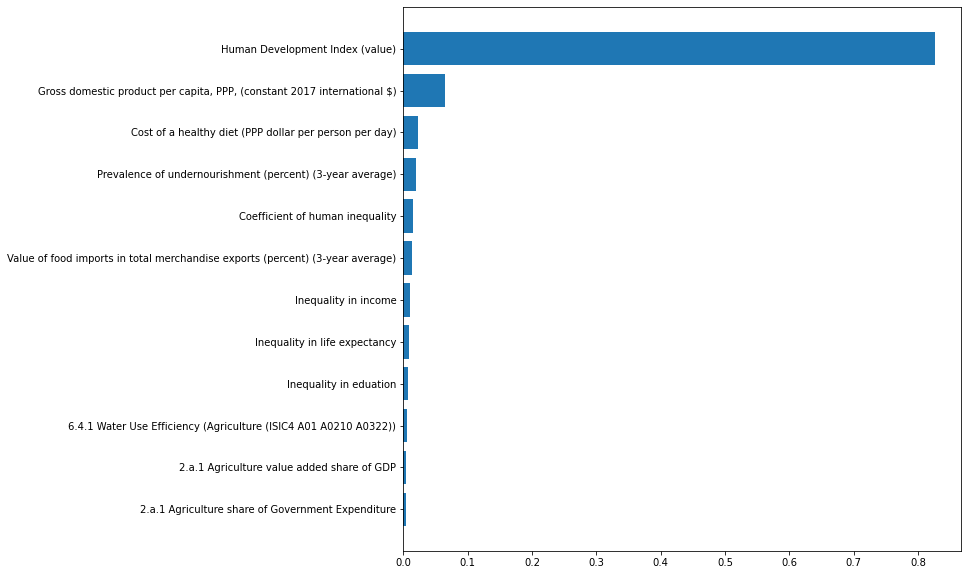

In [77]:
plt_x, plt_y = list(zip(*sorted(zip(importance, df_independents), reverse=False)))

plt.figure(figsize=(10,10))
plt.barh(plt_y, plt_x)

plt.show

### Clustering Model

#### Para o modelo de clustering inicial, vamos manter apenas 2017 e com valor

In [80]:
df3 = df2.drop(df[(df['Year'] != 2017)].index).dropna().copy(deep=True)

pd.set_option('display.max_rows', 12)
df3

,Area,Year,Cost of a healthy diet (PPP dollar per person per day),Coefficient of human inequality,Human Development Index (value),Inequality in eduation,Inequality in income,Inequality in life expectancy,2.a.1 Agriculture share of Government Expenditure,2.a.1 Agriculture value added share of GDP,6.4.1 Water Use Efficiency (Agriculture (ISIC4 A01 A0210 A0322)),6.4.1 Water Use Efficiency (Industries),"Gross domestic product per capita, PPP, (constant 2017 international $)",Per capita food supply variability (kcal/cap/day),Value of food imports in total merchandise exports (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Percentage of the population unable to afford a healthy diet (percent)
0,Armenia,2017,3.096,10.007349,0.775,2.93495,18.95179,8.135306,2.49,14.99,0.30,19.72,12509.6,42.0,29.0,2.5,37.1
10,Albania,2017,3.952,13.890872,0.796,12.33344,23.21014,6.129035,2.21,19.02,1.22,19.65,12771.0,46.0,25.0,4.2,31.3
15,Algeria,2017,3.763,21.383477,0.738,33.68956,16.80919,13.651680,3.16,11.76,0.86,324.62,11809.5,27.0,25.0,2.6,32.5
30,Angola,2017,4.327,37.266070,0.597,34.17144,46.40414,31.222630,0.50,10.02,0.37,196.79,7216.1,90.0,8.0,14.4,81.4
40,Argentina,2017,3.341,12.244472,0.853,6.20843,22.51794,8.007047,0.58,5.23,0.07,32.55,23597.1,34.0,3.0,2.9,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,Zambia,2017,3.085,37.489289,0.568,21.73491,63.39851,27.334446,7.93,4.02,0.05,57.67,3395.5,13.0,5.0,31.2,88.5
981,Belgium,2017,2.862,7.928881,0.931,7.60388,12.45454,3.728222,0.16,0.67,1.44,23.32,50442.3,34.0,7.0,2.5,0.3
986,Luxembourg,2017,2.492,8.994192,0.918,8.00315,15.68856,3.290865,0.66,0.23,0.00,3856.00,114986.0,18.0,12.0,2.5,0.4
992,Serbia,2017,4.070,10.589363,0.802,8.13663,19.26656,4.364899,2.24,6.01,0.17,2.20,16611.0,117.0,8.0,2.5,27.2


In [81]:
df3[df3['Area'] == 'Brazil']

,Area,Year,Cost of a healthy diet (PPP dollar per person per day),Coefficient of human inequality,Human Development Index (value),Inequality in eduation,Inequality in income,Inequality in life expectancy,2.a.1 Agriculture share of Government Expenditure,2.a.1 Agriculture value added share of GDP,6.4.1 Water Use Efficiency (Agriculture (ISIC4 A01 A0210 A0322)),6.4.1 Water Use Efficiency (Industries),"Gross domestic product per capita, PPP, (constant 2017 international $)",Per capita food supply variability (kcal/cap/day),Value of food imports in total merchandise exports (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Percentage of the population unable to afford a healthy diet (percent)
95,Brazil,2017,2.809,23.035445,0.758,16.51122,42.52005,10.075064,0.93,4.6,0.39,29.37,14477.9,37.0,4.0,2.5,19.6


#### Padronização dos dados

In [82]:
scaler = StandardScaler()
scaler_feat = scaler.fit_transform(df3[df_features])

df3_std = pd.DataFrame(scaler_feat, index=df3.index, columns=df3[df_features].columns)
df3_std

,Cost of a healthy diet (PPP dollar per person per day),Coefficient of human inequality,Human Development Index (value),Inequality in eduation,Inequality in income,Inequality in life expectancy,2.a.1 Agriculture share of Government Expenditure,2.a.1 Agriculture value added share of GDP,6.4.1 Water Use Efficiency (Agriculture (ISIC4 A01 A0210 A0322)),6.4.1 Water Use Efficiency (Industries),"Gross domestic product per capita, PPP, (constant 2017 international $)",Per capita food supply variability (kcal/cap/day),Value of food imports in total merchandise exports (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Percentage of the population unable to afford a healthy diet (percent)
0,-0.189103,-0.892324,0.293594,-1.092554,-0.707307,-0.536729,-0.046473,0.335078,-0.208918,-0.323652,-0.414499,0.115564,0.127483,-0.682584,0.015457
10,1.195866,-0.562047,0.423182,-0.438757,-0.400928,-0.718004,-0.153174,0.680016,0.154401,-0.323767,-0.401662,0.263246,0.024829,-0.519242,-0.149370
15,0.890072,0.075168,0.065271,1.046859,-0.861463,-0.038300,0.208849,0.058614,0.012233,0.178367,-0.448878,-0.438243,0.024829,-0.672976,-0.115268
30,1.802598,1.425916,-0.804824,1.080380,1.267831,1.549313,-0.804817,-0.090318,-0.181275,-0.032106,-0.674446,1.887748,-0.411450,0.460811,1.274392
40,0.207295,-0.702066,0.774923,-0.864837,-0.450730,-0.548318,-0.774330,-0.500306,-0.299748,-0.302527,0.129973,-0.179800,-0.539768,-0.644151,-0.845621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,-0.206901,1.444900,-0.983779,0.215246,2.490540,1.197998,2.026588,-0.603874,-0.307647,-0.261167,-0.862063,-0.955130,-0.488441,2.075016,1.476162
981,-0.567705,-1.069090,1.256252,-0.767764,-1.174770,-0.934928,-0.934383,-0.890609,0.241282,-0.317724,1.448255,-0.179800,-0.437114,-0.682584,-1.030340
986,-1.166348,-0.978489,1.176030,-0.739990,-0.942089,-0.974446,-0.743844,-0.928270,-0.327392,5.992790,4.617789,-0.770528,-0.308796,-0.682584,-1.027498
992,1.386784,-0.842827,0.460207,-0.730704,-0.684660,-0.877402,-0.141742,-0.433544,-0.260257,-0.352498,-0.213092,2.884602,-0.411450,-0.682584,-0.265885


> Funções para achar o número de clusters necessários

In [136]:
def optimal_number_of_clusters(wcss):
    """
    Calcula a maior distância entre os pontos que marcam as 
    somas dos quadrados intra-clusters para 19 calculadas 
    com `calculate_wcss()`
    
    Parametros
    ----------
    wcss : lista
        lista contendo os valores de soma de quadrados intra-cluster

    
    Returns
    -------
    int : número de clusters 
    """
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]

        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    return distances.index(max(distances)) + 2


def calculate_wcss(data):
    """
    Calcula a soma dos quadrados intra-clusters para 19
    quantidades de clusters, iniciando com o mínimo de 2 clusters
    
    Parametros
    ----------
    data : DataFrame
        conjunto de dados para fazer o `.fit()` do KMeans

    
    Returns
    -------
    wcss : lista contendo os valores de soma de quadrados intra-cluster
    """
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n, n_init=10)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

df4 = df3.reset_index().copy(deep=True)
df4_std = df3_std.reset_index().copy(deep=True)

# calculando a soma dos quadrados para as 19 quantidade de clusters
sum_of_squares = calculate_wcss(df4_std[df_cluster_feat])

# calculando a quantidade ótima de clusters
n = optimal_number_of_clusters(sum_of_squares)

kmeans = KMeans(n_clusters=n)
clusters = kmeans.fit_predict(df4_std[df_cluster_feat])

# Melhor número de clusters
n

6

In [137]:
df4_std[df_cluster_feat]

,Human Development Index (value),Percentage of the population unable to afford a healthy diet (percent)
0,0.293594,0.015457
1,0.423182,-0.149370
2,0.065271,-0.115268
3,-0.804824,1.274392
4,0.774923,-0.845621
...,...,...
118,-0.983779,1.476162
119,1.256252,-1.030340
120,1.176030,-1.027498
121,0.460207,-0.265885


#### Gráfico de Cotovelo (elbow)

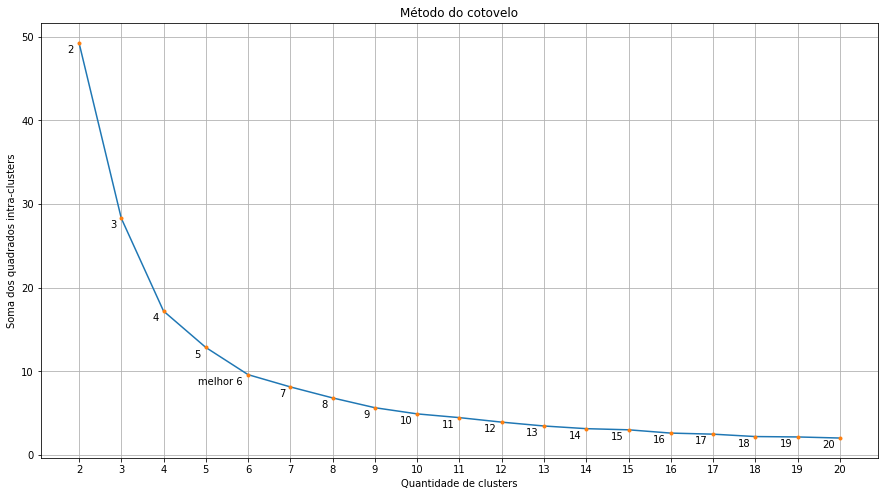

In [138]:
x1, x2 = 2, 20
intervalo = range(x1,x2+1)

plt.figure(figsize=(15,8))
plt.title('Método do cotovelo')
plt.xlabel('Quantidade de clusters')
plt.ylabel('Soma dos quadrados intra-clusters')
plt.grid()
plt.xticks(intervalo)
plt.plot(intervalo, sum_of_squares) # pontos laranjas
plt.plot(intervalo, sum_of_squares, '.') # linha azul
for x,y in zip(intervalo,sum_of_squares): # colocando nome nos pontos
    if (x == n):
        label = "melhor {}".format(x)
    else:
        label = "{}".format(x)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(-5,-10),
                 ha='right')
plt.show()

#### Gráfico de Dispersão

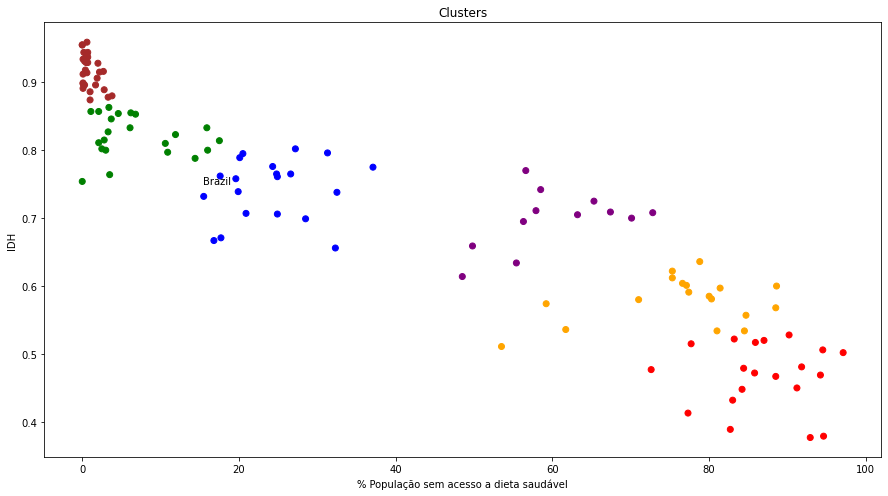

In [139]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

def set_color(x):
    return colors[x]

change_color = np.vectorize(set_color)

cluster_colors = change_color(clusters)

idx_br = df4[df4['Area'] == 'Brazil'].index
cor_br = clusters[idx_br]

plt.figure(figsize=(15,8))
plt.title('Clusters')
plt.xlabel('% População sem acesso a dieta saudável')
plt.ylabel('IDH')


for index, reg in df4.iterrows(): # colocando nome nos pontos
    x = reg['Percentage of the population unable to afford a healthy diet (percent)']
    y = reg['Human Development Index (value)']
    pais = reg['Area']
    
    if (index == idx_br):
        label = pais
    else:
        label = ''
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(-5,-5),
                 ha='right')
    
plt.scatter(df4['Percentage of the population unable to afford a healthy diet (percent)'],
            df4['Human Development Index (value)'],
            c = cluster_colors)



#### Países do mesmo grupo do Brasil

In [144]:
grupo_br = np.where( clusters == cor_br)

df_cluster_br = df4.iloc[grupo_br]

df_cluster_br

,index,Area,Year,Cost of a healthy diet (PPP dollar per person per day),Coefficient of human inequality,Human Development Index (value),Inequality in eduation,Inequality in income,Inequality in life expectancy,2.a.1 Agriculture share of Government Expenditure,2.a.1 Agriculture value added share of GDP,6.4.1 Water Use Efficiency (Agriculture (ISIC4 A01 A0210 A0322)),6.4.1 Water Use Efficiency (Industries),"Gross domestic product per capita, PPP, (constant 2017 international $)",Per capita food supply variability (kcal/cap/day),Value of food imports in total merchandise exports (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Percentage of the population unable to afford a healthy diet (percent)
0,0,Armenia,2017,3.096,10.007349,0.775,2.93495,18.95179,8.135306,2.49,14.99,0.30,19.72,12509.6,42.0,29.0,2.5,37.1
1,10,Albania,2017,3.952,13.890872,0.796,12.33344,23.21014,6.129035,2.21,19.02,1.22,19.65,12771.0,46.0,25.0,4.2,31.3
2,15,Algeria,2017,3.763,21.383477,0.738,33.68956,16.80919,13.651680,3.16,11.76,0.86,324.62,11809.5,27.0,25.0,2.6,32.5
8,85,Bolivia (Plurinational State of),2017,3.551,24.229746,0.707,19.30220,33.80645,19.580589,2.38,11.59,0.37,271.46,8244.9,25.0,8.0,14.9,20.9
10,95,Brazil,2017,2.809,23.035445,0.758,16.51122,42.52005,10.075064,0.93,4.60,0.39,29.37,14477.9,37.0,4.0,2.5,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,671,Peru,2017,3.084,21.465259,0.765,20.93130,33.96420,9.500277,1.80,6.78,0.27,18.82,12442.7,14.0,9.0,6.1,26.6
106,851,Thailand,2017,3.971,16.017207,0.795,17.39676,22.71498,7.939880,6.22,8.41,0.37,49.92,17008.0,16.0,4.0,6.8,20.5
107,881,Tunisia,2017,3.476,22.627748,0.732,34.57692,22.91706,10.389265,3.95,8.99,0.28,122.96,10874.9,13.0,14.0,2.7,15.5
115,946,Viet Nam,2017,3.586,16.932013,0.706,17.63946,19.50510,13.651478,4.24,12.93,0.28,28.23,9050.7,28.0,6.0,6.8,24.9


In [141]:
df_cluster_br.to_excel("../data/processed/cluster_br_2.xlsx")

#### Visualizar todos os grupos

In [150]:
pd.set_option('display.max_rows', None)

In [151]:
df4.iloc[np.where( clusters == 0)]

,index,Area,Year,Cost of a healthy diet (PPP dollar per person per day),Coefficient of human inequality,Human Development Index (value),Inequality in eduation,Inequality in income,Inequality in life expectancy,2.a.1 Agriculture share of Government Expenditure,2.a.1 Agriculture value added share of GDP,6.4.1 Water Use Efficiency (Agriculture (ISIC4 A01 A0210 A0322)),6.4.1 Water Use Efficiency (Industries),"Gross domestic product per capita, PPP, (constant 2017 international $)",Per capita food supply variability (kcal/cap/day),Value of food imports in total merchandise exports (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Percentage of the population unable to afford a healthy diet (percent)
0,0,Armenia,2017,3.096,10.007349,0.775,2.93495,18.95179,8.135306,2.49,14.99,0.30,19.72,12509.6,42.0,29.0,2.5,37.1
1,10,Albania,2017,3.952,13.890872,0.796,12.33344,23.21014,6.129035,2.21,19.02,1.22,19.65,12771.0,46.0,25.0,4.2,31.3
2,15,Algeria,2017,3.763,21.383477,0.738,33.68956,16.80919,13.651680,3.16,11.76,0.86,324.62,11809.5,27.0,25.0,2.6,32.5
8,85,Bolivia (Plurinational State of),2017,3.551,24.229746,0.707,19.30220,33.80645,19.580589,2.38,11.59,0.37,271.46,8244.9,25.0,8.0,14.9,20.9
10,95,Brazil,2017,2.809,23.035445,0.758,16.51122,42.52005,10.075064,0.93,4.60,0.39,29.37,14477.9,37.0,4.0,2.5,19.6
19,175,Colombia,2017,2.863,21.905167,0.765,19.10680,36.80381,9.804891,0.79,6.39,0.12,34.75,14334.9,42.0,13.0,4.5,24.8
25,230,Dominican Republic,2017,3.521,20.332891,0.761,15.70572,26.94865,18.344303,2.37,5.34,0.17,31.82,16524.5,26.0,22.0,6.7,24.9
27,240,Ecuador,2017,2.788,17.442028,0.762,13.76572,28.77295,9.787413,1.08,9.33,0.68,56.27,11679.4,55.0,6.0,9.7,17.6
32,295,Gabon,2017,3.358,25.430481,0.699,23.47992,31.41673,21.394794,0.29,5.26,0.25,462.47,14478.1,15.0,10.0,17.4,28.5
46,395,Iraq,2017,3.378,23.981857,0.667,30.63102,25.47499,15.839560,0.22,2.98,0.09,19.15,9976.9,24.0,15.0,17.6,16.8


In [152]:
df4.iloc[np.where( clusters == 1)]

,index,Area,Year,Cost of a healthy diet (PPP dollar per person per day),Coefficient of human inequality,Human Development Index (value),Inequality in eduation,Inequality in income,Inequality in life expectancy,2.a.1 Agriculture share of Government Expenditure,2.a.1 Agriculture value added share of GDP,6.4.1 Water Use Efficiency (Agriculture (ISIC4 A01 A0210 A0322)),6.4.1 Water Use Efficiency (Industries),"Gross domestic product per capita, PPP, (constant 2017 international $)",Per capita food supply variability (kcal/cap/day),Value of food imports in total merchandise exports (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Percentage of the population unable to afford a healthy diet (percent)
3,30,Angola,2017,4.327,37.266070,0.597,34.17144,46.40414,31.222630,0.50,10.02,0.37,196.79,7216.1,90.0,8.0,14.4,81.4
7,70,Bangladesh,2017,2.882,29.679367,0.622,35.55633,35.71950,17.762270,7.38,12.96,0.85,103.26,4830.8,31.0,21.0,14.3,75.3
12,125,Myanmar,2017,3.706,22.548411,0.580,26.85272,17.55600,23.236513,5.09,23.00,0.19,50.96,4312.9,18.0,22.0,3.4,71.0
13,135,Cameroon,2017,2.616,39.061838,0.574,32.95967,52.85953,31.366314,3.03,16.69,0.06,74.24,3691.1,70.0,25.0,5.0,59.2
20,185,Congo,2017,3.343,32.946497,0.600,20.93222,55.11418,22.793091,1.00,7.42,0.22,176.89,4073.9,54.0,6.0,28.5,88.6
35,315,Ghana,2017,3.767,36.985878,0.585,35.10167,50.95020,24.905764,0.71,19.56,0.15,161.19,4929.6,78.0,15.0,8.3,80.0
38,355,Haiti,2017,3.930,39.175500,0.557,37.33677,52.06961,28.120121,8.87,18.90,0.24,65.94,3187.8,30.0,134.0,39.6,84.7
43,380,India,2017,2.824,31.899432,0.636,38.66773,37.44141,19.589155,7.47,16.56,0.43,35.05,6112.1,18.0,8.0,13.5,78.8
55,445,Kenya,2017,2.846,29.457301,0.591,22.89552,43.05246,22.423922,1.77,20.89,0.15,37.44,4312.9,38.0,38.0,21.5,77.4
58,475,Lao People's Democratic Republic,2017,3.776,25.242580,0.612,31.31796,21.41804,22.991739,1.02,16.20,0.13,19.47,7211.3,58.0,13.0,5.9,75.3


In [153]:
df4.iloc[np.where( clusters == 2)]

,index,Area,Year,Cost of a healthy diet (PPP dollar per person per day),Coefficient of human inequality,Human Development Index (value),Inequality in eduation,Inequality in income,Inequality in life expectancy,2.a.1 Agriculture share of Government Expenditure,2.a.1 Agriculture value added share of GDP,6.4.1 Water Use Efficiency (Agriculture (ISIC4 A01 A0210 A0322)),6.4.1 Water Use Efficiency (Industries),"Gross domestic product per capita, PPP, (constant 2017 international $)",Per capita food supply variability (kcal/cap/day),Value of food imports in total merchandise exports (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Percentage of the population unable to afford a healthy diet (percent)
4,40,Argentina,2017,3.341,12.244472,0.853,6.20843,22.517940,8.007047,0.58,5.23,0.07,32.55,23597.1,34.0,3.0,2.9,6.8
11,120,Bulgaria,2017,3.780,12.821186,0.810,6.32881,26.335570,5.799177,2.47,4.04,0.12,2.67,21470.0,42.0,9.0,3.8,10.6
18,170,Chile,2017,3.053,15.411841,0.854,7.50019,33.012330,5.723002,1.50,3.98,0.23,40.08,24546.9,19.0,7.0,3.1,4.6
21,195,Costa Rica,2017,3.961,17.676115,0.800,11.93930,35.098520,5.990524,1.17,4.70,0.47,46.49,20168.2,35.0,19.0,3.7,16.0
23,210,Azerbaijan,2017,2.348,6.894989,0.754,3.56390,3.587569,13.533497,2.48,5.61,0.19,44.30,14121.4,35.0,9.0,2.5,0.0
26,235,Belarus,2017,3.177,6.997555,0.811,3.67781,13.451820,3.863036,4.98,7.57,0.07,35.14,18356.1,37.0,13.0,2.5,2.1
40,365,Hungary,2017,3.302,6.740378,0.846,3.19396,13.013240,4.013933,1.10,3.75,0.40,9.09,29501.1,79.0,4.0,2.5,3.7
41,370,Croatia,2017,4.168,8.124152,0.855,4.93405,15.726210,3.712197,1.54,2.89,0.48,19.28,27207.0,53.0,17.0,2.5,6.2
45,390,Iran (Islamic Republic of),2017,3.005,24.361156,0.788,37.08170,26.705340,9.296428,2.60,9.83,0.26,140.64,15163.3,25.0,11.0,6.8,14.4
51,420,Kazakhstan,2017,2.391,8.485209,0.802,3.16666,14.451990,7.836977,4.35,4.52,0.04,8.67,24863.0,56.0,7.0,2.5,2.5


In [154]:
df4.iloc[np.where( clusters == 3)]

,index,Area,Year,Cost of a healthy diet (PPP dollar per person per day),Coefficient of human inequality,Human Development Index (value),Inequality in eduation,Inequality in income,Inequality in life expectancy,2.a.1 Agriculture share of Government Expenditure,2.a.1 Agriculture value added share of GDP,6.4.1 Water Use Efficiency (Agriculture (ISIC4 A01 A0210 A0322)),6.4.1 Water Use Efficiency (Industries),"Gross domestic product per capita, PPP, (constant 2017 international $)",Per capita food supply variability (kcal/cap/day),Value of food imports in total merchandise exports (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Percentage of the population unable to afford a healthy diet (percent)
15,155,Central African Republic,2017,3.423,45.127063,0.379,34.54960,62.02571,38.805878,6.27,32.79,0.12,31.16,839.6,65.0,66.0,48.0,94.6
17,165,Chad,2017,2.831,44.113689,0.389,42.95010,47.86935,41.521618,3.26,38.43,0.08,34.27,1579.8,62.0,9.0,26.1,82.7
33,300,Gambia,2017,2.942,37.294224,0.477,49.32129,36.78957,25.771811,2.59,21.00,0.12,11.39,1927.0,35.0,155.0,16.7,72.6
37,345,Guinea,2017,3.655,41.295874,0.467,50.83121,35.66884,37.387573,1.91,20.53,0.04,55.84,2383.6,21.0,28.0,13.3,88.5
50,415,CÃÂ´te d'Ivoire,2017,3.273,44.277930,0.515,45.60904,54.24676,32.977989,1.90,18.74,0.25,39.16,4750.9,29.0,11.0,10.6,77.7
59,485,Lesotho,2017,3.770,39.720243,0.522,21.91631,63.04202,34.202400,2.97,4.96,0.02,27.60,2571.7,120.0,35.0,34.0,83.2
60,490,Liberia,2017,4.018,37.221521,0.481,42.87091,36.42431,32.369343,1.10,64.17,0.04,3.65,1533.4,27.0,107.0,35.3,91.8
62,510,Madagascar,2017,2.987,33.596383,0.502,30.10000,44.88378,25.805368,3.94,24.55,0.11,14.54,1548.2,59.0,20.0,41.9,97.1
63,515,Malawi,2017,2.724,31.705482,0.506,28.42429,44.20169,22.490467,16.13,22.93,0.05,30.87,1454.8,38.0,27.0,14.3,94.5
65,530,Mali,2017,2.900,32.936048,0.413,42.00920,20.98893,35.810013,15.22,36.89,0.04,724.34,2153.8,47.0,20.0,3.8,77.3


In [155]:
df4.iloc[np.where( clusters == 4)]

,index,Area,Year,Cost of a healthy diet (PPP dollar per person per day),Coefficient of human inequality,Human Development Index (value),Inequality in eduation,Inequality in income,Inequality in life expectancy,2.a.1 Agriculture share of Government Expenditure,2.a.1 Agriculture value added share of GDP,6.4.1 Water Use Efficiency (Agriculture (ISIC4 A01 A0210 A0322)),6.4.1 Water Use Efficiency (Industries),"Gross domestic product per capita, PPP, (constant 2017 international $)",Per capita food supply variability (kcal/cap/day),Value of food imports in total merchandise exports (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Percentage of the population unable to afford a healthy diet (percent)
9,90,Botswana,2017,3.622,30.461721,0.705,23.27683,45.48167,22.626663,3.46,1.84,0.08,228.77,14656.8,26.0,9.0,25.0,63.2
16,160,Sri Lanka,2017,3.702,18.815883,0.770,11.99693,38.25992,6.190798,5.34,7.83,0.30,27.10,13584.2,29.0,19.0,8.1,56.6
28,245,Egypt,2017,3.457,23.048839,0.709,36.94291,20.03285,12.170757,1.35,11.49,0.65,20.14,10435.9,30.0,46.0,6.0,67.4
39,360,Honduras,2017,3.360,22.529260,0.614,23.34882,33.20247,11.036491,1.94,12.67,0.24,47.39,5447.7,46.0,16.0,14.9,48.5
44,385,Indonesia,2017,4.129,19.315016,0.708,18.48570,24.57862,14.880727,5.03,13.16,0.29,39.64,10941.9,27.0,8.0,6.7,72.8
52,425,Jamaica,2017,5.975,16.211465,0.711,5.60595,33.68349,9.344955,1.94,6.63,1.90,2.89,9984.6,26.0,63.0,7.7,57.9
54,440,Kyrgyzstan,2017,2.970,10.457606,0.695,4.97927,14.20313,12.190418,0.89,12.51,0.11,5.33,5046.7,32.0,30.0,5.5,56.3
70,555,Mongolia,2017,4.544,13.891496,0.742,11.92020,18.81086,10.943427,1.12,11.14,0.26,26.35,11431.5,41.0,8.0,6.8,58.5
74,581,Namibia,2017,3.255,33.314984,0.634,25.01567,52.99237,21.936911,2.65,7.68,0.07,182.06,10335.3,22.0,18.0,19.3,55.4
87,676,Philippines,2017,3.843,17.861631,0.700,10.09580,27.88749,15.601602,3.80,10.18,0.19,5.97,8001.8,24.0,12.0,7.8,70.1


In [157]:
df4.iloc[np.where( clusters == 5)]

,index,Area,Year,Cost of a healthy diet (PPP dollar per person per day),Coefficient of human inequality,Human Development Index (value),Inequality in eduation,Inequality in income,Inequality in life expectancy,2.a.1 Agriculture share of Government Expenditure,2.a.1 Agriculture value added share of GDP,6.4.1 Water Use Efficiency (Agriculture (ISIC4 A01 A0210 A0322)),6.4.1 Water Use Efficiency (Industries),"Gross domestic product per capita, PPP, (constant 2017 international $)",Per capita food supply variability (kcal/cap/day),Value of food imports in total merchandise exports (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Percentage of the population unable to afford a healthy diet (percent)
5,45,Australia,2017,2.259,8.610341,0.937,4.50189,17.77822,3.550914,0.65,2.46,0.39,104.32,48400.2,46.0,5.0,2.5,0.7
6,50,Austria,2017,2.772,7.372052,0.914,2.99960,15.84823,3.268325,0.70,1.21,2.00,39.66,54173.0,52.0,7.0,2.5,0.6
14,140,Canada,2017,2.863,8.146148,0.929,2.52058,17.51309,4.404775,0.99,1.89,0.29,12.75,48317.2,30.0,7.0,2.5,0.7
22,205,Cyprus,2017,2.846,10.009713,0.891,11.03770,16.25336,2.738080,1.48,1.85,0.71,125.55,38415.1,52.0,29.0,2.5,0.1
24,220,Denmark,2017,2.376,5.908394,0.944,3.01247,11.11047,3.602242,0.30,1.30,1.31,1731.20,55356.7,13.0,8.0,2.5,0.2
29,260,Estonia,2017,3.125,7.168745,0.886,2.24441,15.56505,3.696776,1.41,2.39,0.65,2.97,33821.9,39.0,9.0,2.5,1.0
30,270,Finland,2017,2.545,5.572889,0.934,2.27412,11.45000,2.994546,1.31,2.32,0.05,36.16,47570.1,20.0,7.0,2.5,0.1
31,275,France,2017,2.936,9.907303,0.899,9.13500,16.65512,3.931788,0.42,1.54,1.72,20.51,44577.1,78.0,9.0,2.5,0.1
34,305,Germany,2017,2.786,7.228718,0.944,2.71210,15.53201,3.442045,0.44,0.85,2.21,53.46,53071.5,13.0,5.0,2.5,0.7
36,325,Greece,2017,3.037,11.930716,0.880,12.77040,19.39413,3.627618,0.48,3.86,0.45,56.87,28604.9,57.0,19.0,2.5,3.8


In [159]:
pd.set_option('display.max_rows', 12)

## 3.1 Identifying key variables

> Guide the reader around the thought proccess about which variables were considered key to the model.

## 3.2 Building the model

> Guide the reader throughout the implementation and the decision of using the chosen model.

## 3.3 Extracting insights

> Be very thorough about which insights can be concluded from the data and how.

# 4 Conclusion

> Summarize the insights previously found.

## 4.1 Discussion

> What makes those insights relevant and how do they relate to the initial business needs?

## 4.2 Next steps

> If it makes sense, talk about the next logical steps that should follow the conclusion.